<a href="https://colab.research.google.com/github/CoderArshia/Project-119/blob/main/Project_119_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files 
data = files.upload()

Saving project C119.csv to project C119 (1).csv


In [7]:
import pandas as pd 
c_names = ["PassengerId","Pclass","Sex","Age","SibSp","Parch","Survived"]

df = pd.read_csv("project C119.csv",names=c_names).iloc[1:]
print(df.head(10))


   PassengerId Pclass Sex   Age SibSp Parch Survived
1            1      3   1  34.5     1     0        0
2            2      1   0    47     1     0        1
3            3      3   0    62     0     0        1
4            4      1   0    27     1     0        1
5            5      3   1    22     0     0        0
6            6      3   1    14     0     0        0
7            7      1   1    30     0     0        0
8            8      3   1    26     3     1        0
9            9      3   0    18     0     2        1
10          10      2   0    21     1     0        1


In [10]:
features=["PassengerId","Pclass","Sex","Age","SibSp","Parch"]

X = df [features]
y = df.Survived



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)
clf=DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.746268656716418


In [16]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

data = StringIO()
export_graphviz(clf,out_file=data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
print(data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.038<br/>samples = 102<br/>value = [2, 100]<br/>class = 1>, fillcolor="#3d9fe6"] ;
2 -> 4 ;
5 [label=<SibSp &le; 2.5<br/>gini = 0.5<br/>samples = 100<br/>value = [51, 49]<br/>class = 0>, fillcolor="#fefaf7"] ;
1 -> 5 ;
6 [label=<gini = 0.496<br/>samples = 88<br/>value = [40, 48]<br/>class = 1>, fillcolor="#deeffb"] ;
5 

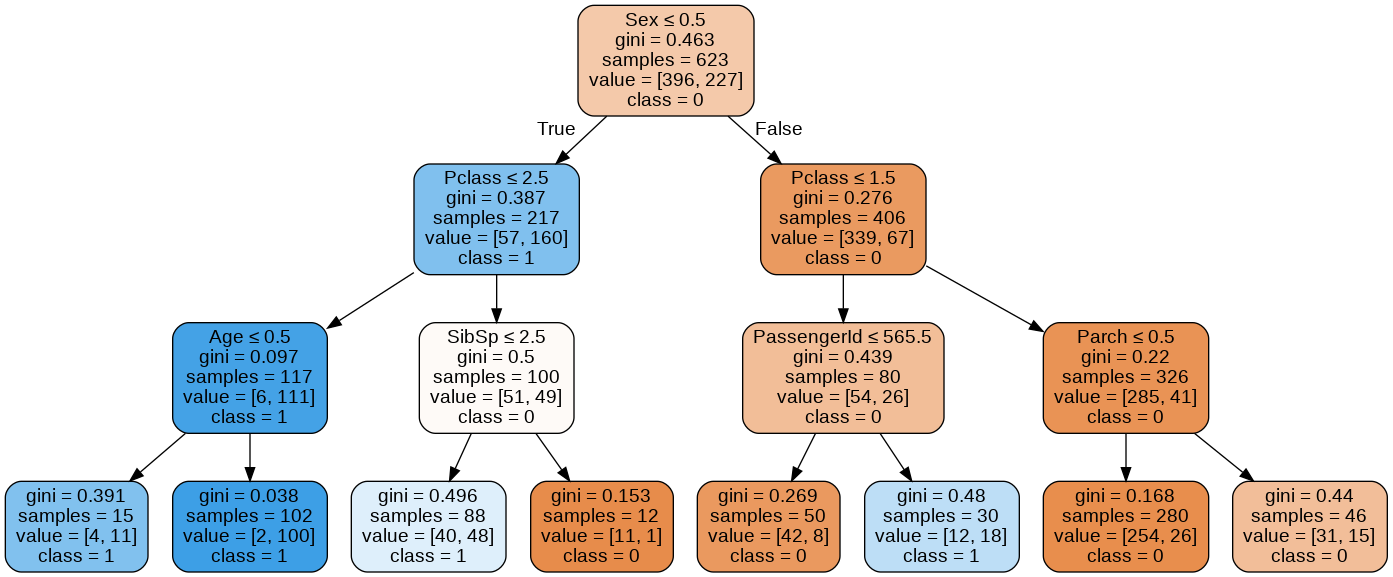

In [17]:
import pydotplus 
graph = pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png("titanic info.png")
Image(graph.create_png())